# 24_Lambda_Functions

This program demonstrates how to fit data using lambda function.

The data is fitted with the function `curve_fit` from the `scipy` module. `curve_fit` takes three arguments, a function `f(x,*args)`, the independent variable `x`, the values of the function `y`. The `curve_fit` function will optimise the `args`.

Nonetheless some of the arguments may be fixed or known. Thus you do not want to adjust them. You could rewrite the function with those parameters hardcoded but this will be redundant and you have to do this everytime the parameter change. In order to avoid having the same equation written again and again in different terms you can use lambda functions.

Lambda functions are usual funtions except they are anonymous. In the case of the fit we have few fixed parameters. We can call the function with the proper arguments set to their value in a lambda function. The output of this lambda function will be the same function but zith those parameters fixed.

Indeed you could create another function rather than using a lambda function. This is what we do in the end by calling this lambda function f. But it is not necessary.

In [1]:
## Library imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
## Functions definitions

def fluo_profile(t,v,K0,Gamma,delta,k,omega,phi):
    return K0*Gamma**2/4 / (Gamma**2/4 + (delta - k*v*np.cos(40*np.pi/180)*np.cos(omega*t-phi))**2)

In [3]:
Gamma = 21.57*1e6*2*np.pi
delta = -8.359*Gamma
wavelength = 397.959060*1e-9
k = 2*np.pi/wavelength
omega = 422.5*1e3*2*np.pi

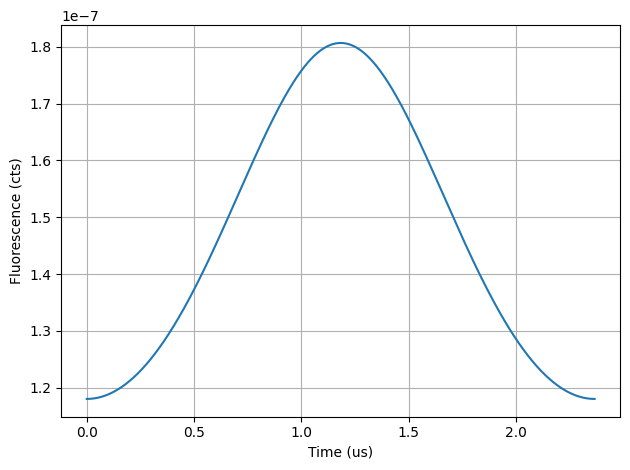

In [4]:
## Plot fluo vs time
## for single trapped ion

# define physical variables

v = 9.97
K0 = 4.05e-5
phi = 0

t = np.linspace(0,1/omega*(2*np.pi),1000)*1e6

# plot fluo_profile

plt.figure('fluo_Ca')

plt.plot(t, fluo_profile(t,v,K0,Gamma,delta,k,omega,phi))

plt.xlabel('Time (us)')
plt.ylabel('Fluorescence (cts)')
plt.grid()
plt.tight_layout()

In [18]:
## open data from REIN 240920
## 30 deg phase experiments

filename = '251106_Histogram_data'
with np.load(filename+'.npz') as data:
    x = data['timelist']*1e-6
    y = data['data']

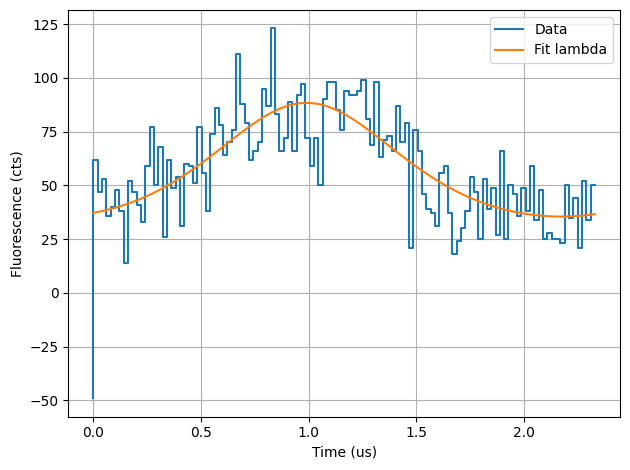

In [48]:
## Plot and fit the data

# fit the data given x (time) and y (fluo)
# The function is fluo_profile but some parameters are fixed (Gamma, delta, k, omega)
# we use a lambda function to fix those parameters
# initial guess is p0, this helps the curve_fit function to converge
# bounds limits the range of the adjusted parameters
# maxfev is the maximum number of iterations
popt, pcov = curve_fit(lambda t,v,K0,phi : fluo_profile(t,v,K0,Gamma=Gamma,delta=delta,k=k,omega=omega,phi=phi),
                        x,
                        y,
                        p0=[10,1e4,np.pi],
                        bounds=([0.1, 0,    0],
                                [1e3,  1e5, 2*np.pi]),
                            maxfev=10000)


# plot
plt.figure('fluo_hist')

# plot histogram data
plt.step(x*1e6,y,label='Data')
# plot the fitted function
plt.plot(x*1e6,f(x,*popt),label='Fit lambda')

plt.xlabel('Time (us)')
plt.ylabel('Fluorescence (cts)')
plt.grid()
plt.tight_layout()
plt.legend()


In [ ]:
# see the value of the fitted parameters with lambda function
print(popt)
# the covariance
print(np.linalg.cond(pcov))
print(np.diag(pcov))
print()

[2.10754687e+01 1.49224626e+04 5.76925677e+00]
39044716.57233514
[3.33296317e+00 2.64022048e+05 6.76214625e-03]

[ 1.90174749e+01  1.54532563e+04  1.35285856e+08 -1.13999352e+09
  1.56366884e+07  2.68119225e+06  3.54698198e-17]
4.521321755553503e+31
[7.18664260e+03 4.01142774e+14 7.52961867e+21 1.06038636e+20
 5.35932606e+02 1.33701629e+12 1.84731672e+00]


In [ ]:
# note you could create a helper function rather than using a lambda function
# helper function
# t is time
# Gamma,delta,k,omega are constant in this experiment
# v,K0,phi are variables to be adjusted by the curve_fit

def fluo_profile_helper(Gamma,delta,k,omega):
    return lambda t,v,K0,phi : fluo_profile(t,v,K0,Gamma=Gamma,delta=delta,k=k,omega=omega,phi=phi)

# you could then call fluo_profile_helper(Gamma,delta,k,omega) in curve fit
# or call it
f = fluo_profile_helper(Gamma,delta,k,omega)
# and use f in curve_fit instead of the lambda function

popt, pcov = curve_fit(f,
                        x,
                        y,
                        p0=[10,1e4,np.pi],
                        bounds=([0.1, 0,    0],
                                [1e3,  1e5, 2*np.pi]),
                            maxfev=10000)

print(popt)
print(np.linalg.cond(pcov))
print(np.diag(pcov))

# popt quantities are the same as before with lambda function

[2.10754687e+01 1.49224626e+04 5.76925677e+00]
39044716.57233514
[3.33296317e+00 2.64022048e+05 6.76214625e-03]


In [ ]:
# If you wanted to fit all the parameters including Gamma, delta, k, omega
# you could do

popt_all, pcov_all = curve_fit(fluo_profile,
                        x,
                        y,
                        p0=[10,1e4,Gamma,-8.4*Gamma,k,omega,np.pi],
                        bounds=([0.1, 0,    Gamma*0.99, -8.5*Gamma, k*0.99, omega*0.99, 0],
                                [1e3,  1e5, Gamma*1.01, -8.3*Gamma, k*1.01, omega*1.01, 2*np.pi]),
                            maxfev=10000)

# see the value of the fitted parameters without lambda
print(popt_all)
# the covariance
print(np.linalg.cond(pcov_all))
print(np.diag(pcov_all))

# But values here have a big uncertainty as those parameters are not well defined by the data
# and anyway it does not make sense to fit them as they are known from the experimental conditions

[ 1.90174749e+01  1.54532563e+04  1.35285856e+08 -1.13999352e+09
  1.56366884e+07  2.68119225e+06  3.54698198e-17]
4.521321755553503e+31
[7.18664260e+03 4.01142774e+14 7.52961867e+21 1.06038636e+20
 5.35932606e+02 1.33701629e+12 1.84731672e+00]
